In [1]:
import numpy as np
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

# 1. Dataset

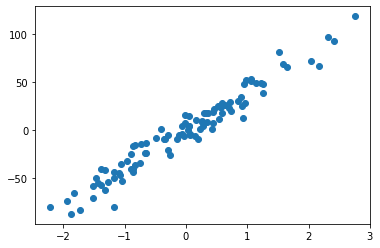

In [2]:
x, y = make_regression(n_samples=100, n_features=1, noise=10)
plt.scatter(x, y)

In [3]:
print(x.shape)
print(y.shape)
y = y.reshape(y.shape[0], 1)   # Besoin de redimensionner le vecteur y. C'est lié à la méthode make_regression
print(y.shape)

(100, 1)
(100,)
(100, 1)


In [4]:
# Matrice X
X = np.hstack((x, np.ones(x.shape)))   # On rajoute la colonne de biais
print(X.shape)

(100, 2)


In [5]:
# Vecteur theta
theta = np.random.randn(2, 1)
print(theta)

[[0.72258787]
 [0.30035562]]


# 2. Modèle

In [6]:
def model(X, theta):
    return X.dot(theta)

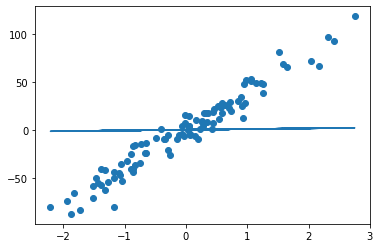

In [7]:
model(X, theta)
plt.plot(x, model(X, theta))
plt.scatter(x, y)

# 3. Fonction coût

In [8]:
def cost_function(X, y, theta):
    m = len(y)
    return 1/(2*m) * np.sum((model(X, theta) - y)**2)

In [9]:
cost_function(X, y, theta)

864.8486328014451

# Descente de gradient

In [10]:
def grad(X, y, theta):
    m = len(y)
    return 1/m * X.T.dot(model(X, theta) - y)

In [11]:
def gradient_descent(X, y, theta, learning_rate, n_iterations):
    cost_history = np.zeros(n_iterations)
    for i in range(0, n_iterations):
        theta = theta - learning_rate * grad(X, y, theta)
        cost_history[i] = cost_function(X, y, theta)
    return theta, cost_history

# Entrainement du modèle

In [12]:
theta_final, cost_history = gradient_descent(X, y, theta, learning_rate=0.01, n_iterations=1000)
print(theta_final)

[[39.43320361]
 [-0.29053483]]


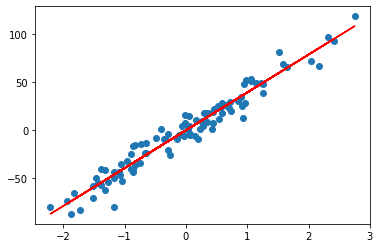

In [13]:
predictions = model(X, theta_final)
plt.scatter(x, y)
plt.plot(x, predictions, c='r')

# Learning curve

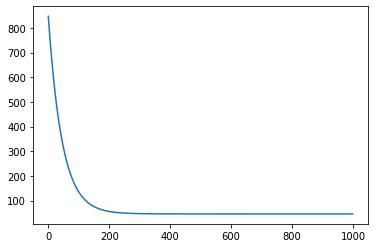

In [14]:
plt.plot(cost_history)


# Coefficient de determination
Permet de déterminer la performance du modèle
$$
R^2 = 1 - \frac {\sum (y - f(x))^2}{\sum (y - \bar{y})^2}
$$

In [15]:
def coeff_determination(y, pred):
    u = ((y - pred)**2).sum()
    v = ((y - y.mean())**2).sum()
    return (1 - u/v)

In [16]:
coeff_determination(y, predictions)

0.948813029310414